In [1]:
!pip install cmake dlib face_recognition numpy opencv-python

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=fabebd2fdd2014ca0c6e822ec40aae91d54228509c295f27b52ad88bc3b9b61b
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


IF YOU WANT TO SEE IT RUNNING YOU NEED TO PUT YOUR OWN IMAGES!
ALSO, IF RUN CURRUPTS RUN ALL OF IT AGAIN, BECAUSE FEW LIST WOULD HAVE REPEATED VALUES IF RAN FROM MIDDLE.

In [2]:
import cv2
from google.colab.patches import cv2_imshow

In [3]:
import face_recognition as fr

In [4]:
import numpy as np

In [5]:
names = []
encodings = []

coding_img , analyse_img and unknown_exist are the functions which would help to define face and recognise them with names.

In [6]:
def coding_img(img,name):
  cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  coded = fr.face_encodings(img)[0]
  names.append(name)
  encodings.append(coded)
  

In [7]:
def analyse_img(img):
  print("If you see unknown face call unknown_exist function!")
  found = []
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  encodeds = fr.face_encodings(img)
  loc = fr.face_locations(img)
  for code,(a,b,c,d) in zip(encodeds,loc):
    cv2.rectangle(img,(d,a),(b,c),(255,0,0),1)
    distance = fr.face_distance(encodings,code)
    least = np.argmin(distance)
    if distance[least]<0.5:
      cv2.putText(img,names[least],(d,a),cv2.FONT_HERSHEY_COMPLEX,1,((57,225,20)),2)
      found.append(names[least])
    else:
      cv2.putText(img,"Unknown",(d,a),cv2.FONT_HERSHEY_COMPLEX,1,((57,225,20)),2)
      found.append("unknown")
  return img,found 



In [8]:
def unknown_exist(img,faces):
  if 'unknown' in faces:
    ques = input("can you recognize the unknowns? yes/no")
    if ques == 'yes':
      name = input("put in the name")
      coding_img(img,name)
          

**TESTING THE CODE**

In [9]:
cris = fr.load_image_file("cr3.jpg")

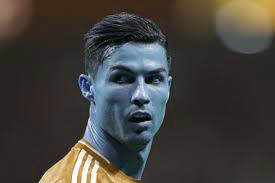

In [10]:
cv2_imshow(cris)

In [11]:
coding_img(cris,"Ronaldo")

In [12]:
cris = cv2.cvtColor(cris,cv2.COLOR_BGR2RGB)

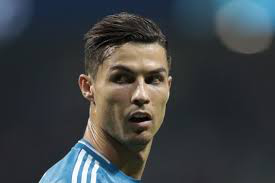

In [13]:
cv2_imshow(cris)

In [14]:
messi = fr.load_image_file("mess.jpg")

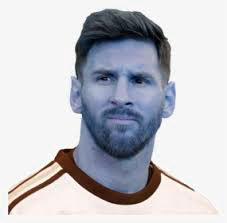

In [15]:
cv2_imshow(messi)
#cris = cv2.cvtColor(cris,cv2.COLOR_BGR2RGB)

In [16]:
coding_img(messi,"Messi")

In [17]:
messi = cv2.cvtColor(messi,cv2.COLOR_BGR2RGB)

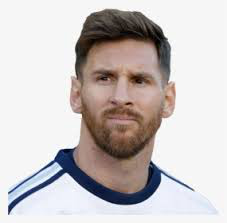

In [18]:
cv2_imshow(messi)

In [19]:
len(encodings)

2

In [20]:
names

['Ronaldo', 'Messi']

In [21]:
multiple_face = fr.load_image_file("three.jpg")

In [22]:
analysed_img, faces = analyse_img(multiple_face)

If you see unknown face call unknown_exist function!


In [23]:
print(f"total number of faces found in image is(are) {len(faces)}")

total number of faces found in image is(are) 3


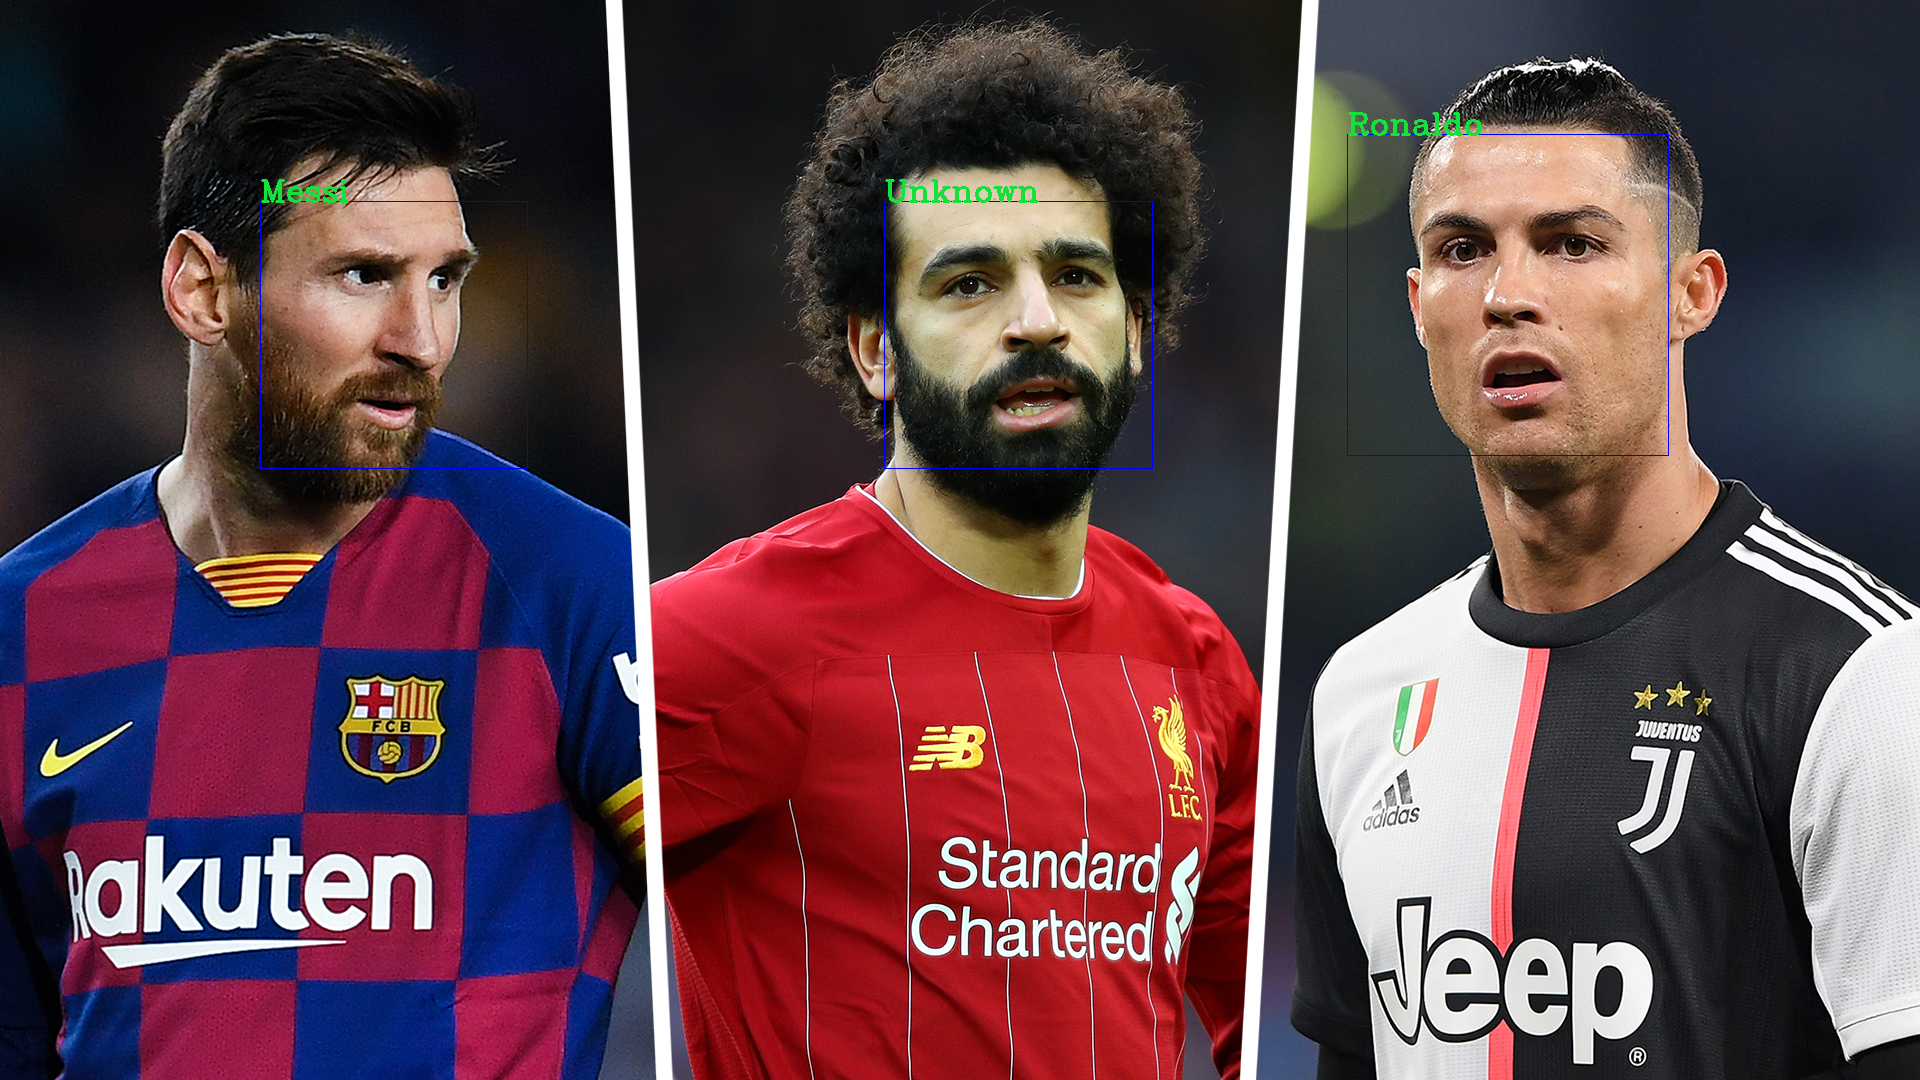

In [24]:
cv2_imshow(analysed_img)

**SALAH IS UNKNOWN WE WILL PUT SALAH IN OUR DATA**
**ALSO ANY USER CAN DO IT TOO**

In [26]:
salah = fr.load_image_file("salah.jpg")

In [27]:
unknown_exist(salah,faces)

can you recognize the unknowns? yes/noyes
put in the nameSalah


In [28]:
resized_pic = cv2.resize(multiple_face,(600,300))

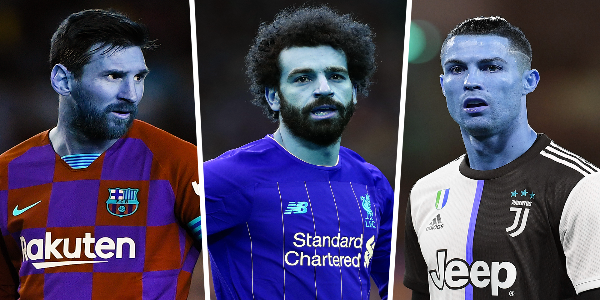

In [29]:
cv2_imshow(resized_pic)

In [30]:
analysed_img_1 , faces_1 = analyse_img(resized_pic) 

If you see unknown face call unknown_exist function!


In [31]:
print(f"total number of faces found in image is(are) {len(faces_1)}")

total number of faces found in image is(are) 3


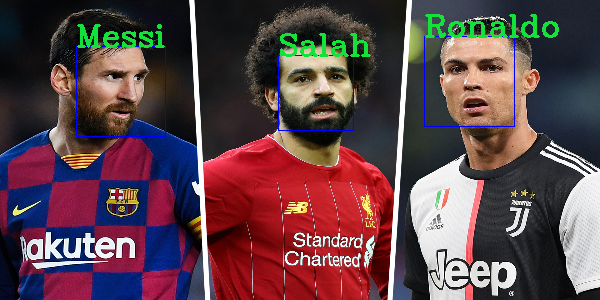

In [32]:
cv2_imshow(analysed_img_1)

**OUR MODEL CAN NOW RECOGNISE SALAH TOO!!**

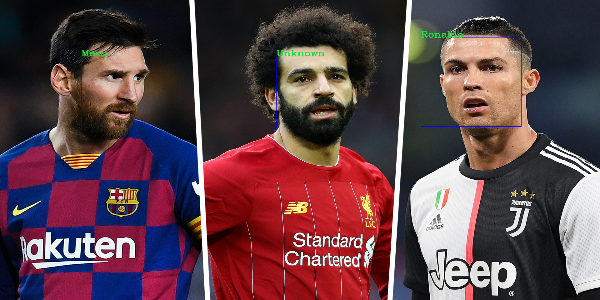

In [33]:
analysed_img = cv2.resize(analysed_img,(600,300))
cv2_imshow(analysed_img)

**WE CAN SEE THE DIFFERENCE IN** analysed_img **SALAH IS UNKNOWN**
**BUT IN** analysed_img_1 **SALAH CAN BE IDENTIFIED**

**WORKING WITH FACIAL LANDMARKS**

chin
left_eyebrow
right_eyebrow
nose_bridge
nose_tip
left_eye
right_eye
top_lip
bottom_lip


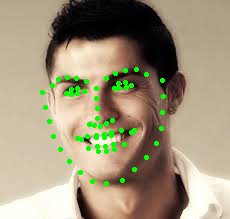

In [36]:
image = fr.load_image_file("goat.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

face_landmarks_list = fr.face_landmarks(image)

features_dict = dict()


for i in range(0,len(face_landmarks_list)):
  for feature in face_landmarks_list[0]:
    if feature in features_dict:
      for j in range(0,len(face_landmarks_list[i][feature])):
        features_dict[feature].append(face_landmarks_list[i][feature][i])
    else:
      features_dict[feature] = face_landmarks_list[i][feature]


for feature in features_dict:
  print(feature)
  for x in features_dict[feature]:
    cv2.circle(image,x,1, (0,255,0), 2)
cv2_imshow(image)    


**TO TEST FOR A NEW IMAGE RECOGNITION YOU NEED TO GO BY THESE STEPS**
1.   Input image as fr.load_image_file(your_image).
2.   Call analyse_img() function with your image as input returning a image and names of faces in image in list.
4.  Use cv2_imshow(returned_image) to see the analysed image .
5.  If you know faces but marked as UNKNOWN you can call unknown_exist(image,namesOfFacesList) where image should be of unknown face without any other faces in image.
6.  Call analyse_func again on same image to see recognised face.



**THE END!!**